In [1]:
from logical_fusions import AdaptiveFusionDecoder, AnalyticShor22, TransversalFusionDecoder
import networkx as nx
from graphs import draw_graph, gen_ring_graph
import matplotlib.pyplot as plt

In [2]:
def best_graphs_func(n=None, shor=False):
    """
    These are the best 6-9 qubit graphs found by Lowe for transversal fusion, optimised at pfail = 0.25
    :param n:
    :return:
    """
    g = nx.Graph()
    if shor:
        g.add_nodes_from(list(range(5)))
        g.add_edges_from([(0, 1), (1, 2), (0, 3), (3, 4)])
    else:
        g.add_nodes_from(list(range(n)))
        if n == 6:
            g.add_edges_from([(0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (2, 5)])
        elif n == 7:
            g.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 6), (1, 4), (1, 5), (2, 4), (3, 4), (3, 5)])
        elif n == 8:
            g.add_edges_from([(0, 1), (0, 2), (0, 4), (0, 6), (0, 7), (1, 3), (1, 4), (1, 5), (2, 3), (2, 5), (3, 5), (3, 7), (4, 5), (4, 7), (5, 6), (6, 7)])
        elif n == 9:
            g.add_edges_from([(0, 2), (0, 3), (0, 4), (0, 7), (0, 8), (1, 2), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 6), (2, 7), (2, 8), (3, 5), (3, 6), (3, 7), (3, 8),
            (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 8), (6, 8), (7, 8)])
    return g


Lets look at the 6 ring encoded shor code discussed in the FBQC paper, and numerically simulate it to test decoder performance
It is locally equivalent to a line graph

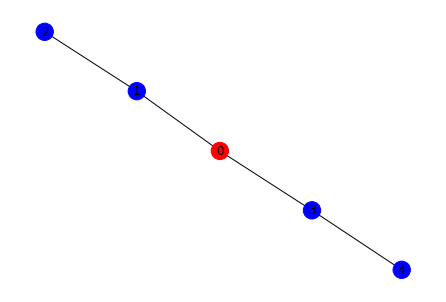

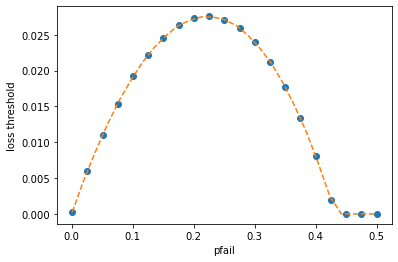

In [3]:
g = best_graphs_func(shor=True)
draw_graph(g)
dec_transversal = TransversalFusionDecoder(g)
dec_transversal.fbqc_decode()
dec_transversal.plot_threshold(show=False, n_points=21, optimising_eta=0.98, w=0.5, line='o')

shor_dec = AnalyticShor22()
shor_dec.plot_threshold(show=True, w=0.5)


There is nice agreement between the numerical and analytic results. Note that the Shor encoding is not optimal with w=0.5.
If we allow this parameter to vary we can do better.



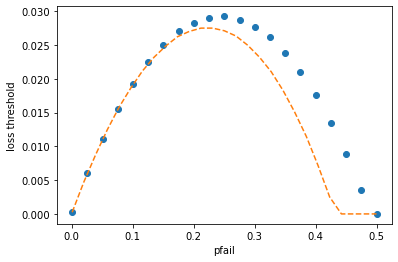

In [4]:
dec_transversal.plot_threshold(show=False, n_points=21, optimising_eta=0.98, line='o')
shor_dec.plot_threshold(show=True, w=0.5)


Now lets inspect the performance of the best 6-9 qubit graphs with transversal fusions



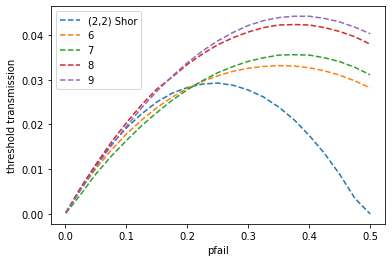

In [5]:
gs = [best_graphs_func(shor=True)]
for nq in [6, 7, 8, 9]:
    gs.append(best_graphs_func(nq))
for g in gs:
    transversal_decoder = TransversalFusionDecoder(g)
    transversal_decoder.fbqc_decode()
    transversal_decoder.plot_threshold(n_points=21, optimising_eta=0.975, show=False)
plt.legend(['(2,2) Shor', 6, 7, 8, 9])
plt.xlabel('pfail')
plt.ylabel('threshold transmission')
plt.show()



Now lets inspect the same graphs with the Adaptive decoder




[('fusion', [1], [], {'x': [], 'z': []}, [], {'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 2, 'zf': 0, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, [1, 1, 1, 1]), ('fusion', [1], [3], {'x': [], 'z': []}, [], {'x': 1, 'xf': 0, 'y': 0, 'yf': 0, 'z': 1, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, [1, 1, 1, 0, 1]), ('zrec', [1], [3, 4], {'x': [], 'z': []}, [], {'x': 0, 'xf': 1, 'y': 0, 'yf': 0, 'z': 1, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, [1, 1, 1]), ('fusion', [1, 3], [2], {'x': [], 'z': []}, [], {'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 2, 'zf': 1, 'fusion': 2, 'ffx': 0, 'ffz': 0, 'floss': 0}, [1, 1, 0, 1, 1, 1, 1]), ('xrec', [1, 3], [2, 4], {'x': [], 'z': []}, [], {'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 1, 'zf': 2, 'fusion': 2, 'ffx': 0, 'ffz': 0, 'floss': 0}, [1, 1, 0, 1, 1, 1]), ('fusion', [1, 4], [2], {'x': [3], 'z': []}, [], {'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 1, 'zf': 1, 'fusion': 2, 'ffx': 1, 'ffz': 0, 'floss': 0}, [1, 1, 0, 1, 1, 0, 1, 1, 1]), ('xrec', [

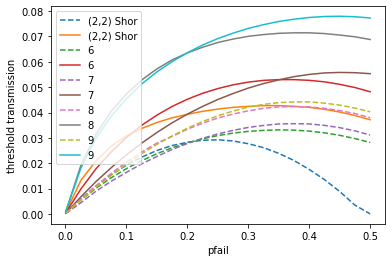

In [6]:
gs = [best_graphs_func(shor=True)]
for nq in [6, 7, 8, 9]:
    gs.append(best_graphs_func(nq))
for g in gs:
    transversal_decoder = TransversalFusionDecoder(g)
    transversal_decoder.fbqc_decode()
    transversal_decoder.plot_threshold(n_points=21, optimising_eta=0.975, show=False)
    adaptive_decoder = AdaptiveFusionDecoder(g)
    adaptive_decoder.build_tree()
    adaptive_decoder.plot_threshold(n_points=21, optimising_eta=0.95, show=False, line='-')
plt.legend(['(2,2) Shor', '(2,2) Shor', 6, 6, 7, 7, 8, 8, 9, 9])
plt.xlabel('pfail')
plt.ylabel('threshold transmission')
plt.show()

[('fusion', [1], [], {'x': [], 'z': []}, [], {'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 2, 'zf': 0, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, [1, 1, 1, 1]), ('fusion', [1], [3], {'x': [], 'z': []}, [], {'x': 1, 'xf': 0, 'y': 0, 'yf': 0, 'z': 1, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, [1, 1, 1, 0, 1]), ('zrec', [1], [3, 4], {'x': [], 'z': []}, [], {'x': 0, 'xf': 1, 'y': 0, 'yf': 0, 'z': 1, 'zf': 1, 'fusion': 1, 'ffx': 0, 'ffz': 0, 'floss': 0}, [1, 1, 1]), ('fusion', [1, 3], [2], {'x': [], 'z': []}, [], {'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 2, 'zf': 1, 'fusion': 2, 'ffx': 0, 'ffz': 0, 'floss': 0}, [1, 1, 0, 1, 1, 1, 1]), ('xrec', [1, 3], [2, 4], {'x': [], 'z': []}, [], {'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 1, 'zf': 2, 'fusion': 2, 'ffx': 0, 'ffz': 0, 'floss': 0}, [1, 1, 0, 1, 1, 1]), ('fusion', [1, 4], [2], {'x': [3], 'z': []}, [], {'x': 0, 'xf': 0, 'y': 0, 'yf': 0, 'z': 1, 'zf': 1, 'fusion': 2, 'ffx': 1, 'ffz': 0, 'floss': 0}, [1, 1, 0, 1, 1, 0, 1, 1, 1]), ('xrec', [

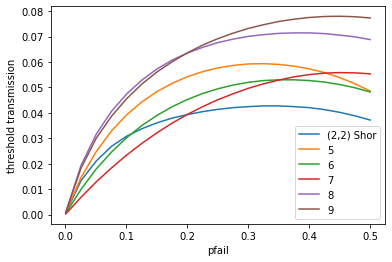

In [7]:
gs = [best_graphs_func(shor=True), gen_ring_graph(5) ]
for nq in [6, 7, 8, 9]:
    gs.append(best_graphs_func(nq))
for g in gs:
    adaptive_decoder = AdaptiveFusionDecoder(g)
    adaptive_decoder.build_tree()
    adaptive_decoder.plot_threshold(n_points=21, optimising_eta=0.95, show=False, line='-')
plt.legend(['(2,2) Shor', 5, 6, 7, 8, 9])
plt.xlabel('pfail')
plt.ylabel('threshold transmission')
plt.show()